<a href="https://colab.research.google.com/github/leonlpz/Reconocimiento_de_Patrones/blob/main/Intro_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

# numpy
# pandas
# seaborn, matplotlib
# sklearn
# TensorFlow, Keras -- Pytorch.

Datos

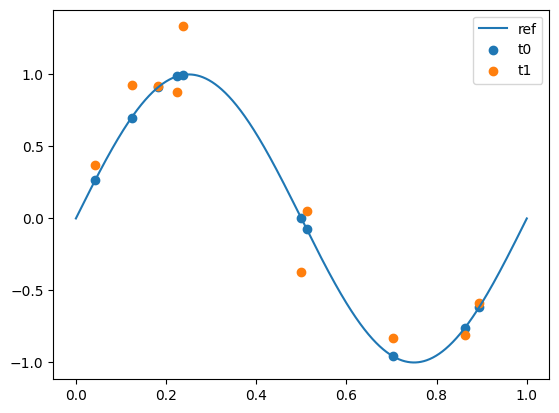

(10, 1) (10, 1) (10, 1)
[[0.86298593]
 [0.18313723]
 [0.8948858 ]
 [0.51200181]
 [0.70321946]
 [0.49895036]
 [0.22427698]
 [0.12341095]
 [0.23837554]
 [0.04295955]]
[[0.86298593]
 [0.18313723]
 [0.8948858 ]
 [0.51200181]
 [0.70321946]
 [0.49895036]
 [0.22427698]
 [0.12341095]
 [0.23837554]
 [0.04295955]] (10, 1)


In [ ]:
x_ref = np.linspace(0,1,1000) #Input
t_ref = np.sin(2*np.pi*x_ref)  #Output

x = np.random.uniform(0,1,10)
x = x.reshape(-1,1)
t0 = np.sin(2*np.pi*x)
t1 = t0 + 0.2*np.random.normal(0,1,t0.shape)

plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t0,label='t0')
plt.scatter(x,t1,label='t1')
plt.legend()
plt.show()

print(x.shape,t0.shape,t1.shape)

print(x)
print(x.reshape(-1,1),x.reshape(-1,1).shape)

In [ ]:
print(x.shape, t1.shape)

(10, 1) (10, 1)


Modelo

$$y_n = w_0 + w_1x_n + w_2x_n^2 + w_3x_n^3 + \dots + w_Mx_n^M$$
$$\mathbf{y} = \tilde{\mathbf{X}}\mathbf{w} $$

$$\tilde{\mathbf{X}} = \begin{bmatrix}1 & x_1& x_1^2 & \dots & x_1^M\\
1 & x_2& x_2^2 & \dots & x_2^M\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_N& x_N^2 & \dots & x_N^M\
\end{bmatrix}$$
$$\mathbf{w}= \begin{bmatrix}w_0\\w_1\\\vdots\\w_M\end{bmatrix}$$

$$\mathbf{y} = \begin{bmatrix}1 & x_1& x_1^2 & \dots & x_1^M\\
1 & x_2& x_2^2 & \dots & x_2^M\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_N& x_N^2 & \dots & x_N^M\
\end{bmatrix}\begin{bmatrix}w_0\\w_1\\\vdots\\w_M\end{bmatrix}$$

$$[N\times (M+1)][(M+1)\times 1]=N\times 1$$

In [ ]:
poly = PolynomialFeatures(3)
x_tilde = poly.fit_transform(x)
print(x_tilde)

[[1.00000000e+00 8.62985932e-01 7.44744719e-01 6.42704215e-01]
 [1.00000000e+00 1.83137234e-01 3.35392464e-02 6.14228482e-03]
 [1.00000000e+00 8.94885801e-01 8.00820597e-01 7.16642982e-01]
 [1.00000000e+00 5.12001814e-01 2.62145857e-01 1.34219155e-01]
 [1.00000000e+00 7.03219463e-01 4.94517613e-01 3.47754410e-01]
 [1.00000000e+00 4.98950362e-01 2.48951464e-01 1.24214423e-01]
 [1.00000000e+00 2.24276982e-01 5.03001646e-02 1.12811691e-02]
 [1.00000000e+00 1.23410951e-01 1.52302627e-02 1.87958120e-03]
 [1.00000000e+00 2.38375538e-01 5.68228969e-02 1.35451886e-02]
 [1.00000000e+00 4.29595538e-02 1.84552327e-03 7.92828561e-05]]


[[-1.09940564]
 [-0.12191198]
 [-1.01510439]
 [-0.6519917 ]
 [-1.03258406]
 [-0.62622973]
 [-0.17451057]
 [-0.05190802]
 [-0.19338615]
 [ 0.03099807]]


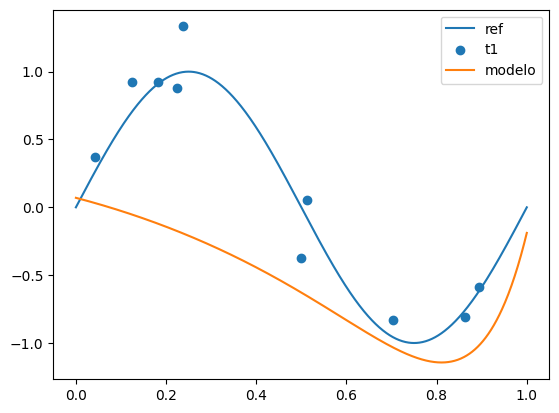

In [ ]:
M = 10 #Orden
w = np.random.normal(0,1,(M+1,1)) #Parámetros
# print(x.shape)


# def model(x_):
#   poly_ = PolynomialFeatures(M)
#   X_tilde = poly_.fit_transform(x_)
#   y = X_tilde@w
#   # y = np.matmul(X_tilde, w)
#   return y

def model_lireg(x_i):
  if len(x_i.shape) == 1:
    x_i = x_i.reshape(-1,1)
  # print(x_i.shape)
  poly_ = PolynomialFeatures(M)
  X_tilde = poly_.fit_transform(x_i)
  y = X_tilde@w

  return y

y = model_lireg(x)
print(y)

plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t1,label='t1')
plt.plot(x_ref.reshape(-1,1),model_lireg(x_ref),label='modelo')
plt.legend()
plt.show()

Costo

### Error Cuadrático

$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N(y_n - t_n)^2$$
$$E(\mathbf{w}) = \frac{1}{2} (\tilde{\mathbf{X}}\mathbf{w}-\mathbf{t})^{\top}(\tilde{\mathbf{X}}\mathbf{w}-\mathbf{t})$$
$$E(\mathbf{w}) = \frac{1}{2} (\mathbf{y}-\mathbf{t})^{\top}(\mathbf{y}-\mathbf{t})$$

$$\begin{bmatrix}y_1-t_1& y_2-t_2 & \dots & y_n-t_n\end{bmatrix}\begin{bmatrix}y_1-t_1\\ y_2-t_2 \\ \dots \\ y_n-t_n\end{bmatrix}$$

In [ ]:
def loss(t1,y):
  e = y - t1
  return 0.5*e.T@e

In [ ]:
y = model_lireg(x)
print(loss(t1,y))

[[3.2382213]]


Aprendizaje

$$\frac{∂}{\partial \mathbf{w}}E(\mathbf{w})= 0$$
$$\frac{∂}{\partial \mathbf{w}}\frac{1}{2} (\tilde{\mathbf{X}}\mathbf{w}-\mathbf{t})^{\top}(\tilde{\mathbf{X}}\mathbf{w}-\mathbf{t})= 0$$

$$\hat{\mathbf{w}} = (\tilde{\mathbf{X}}^{\top}\tilde{\mathbf{X}})^{-1}\tilde{\mathbf{X}}^{\top}\mathbf{t}$$

In [ ]:
def learning(x,t1):
  if len(x.shape) == 1:
    x = x.reshape(-1,1)
  # print(x_i.shape)
  poly_ = PolynomialFeatures(M)
  X_tilde = poly_.fit_transform(x)
  #w = np.linalg.inv(X_tilde.T@X_tilde)@X_tilde.T@t1
  w = np.linalg.pinv(X_tilde)@t1
  return w

w = learning(x,t1)

M, t1.shape, w.shape

(10, (10, 1), (11, 1))

Todo junto

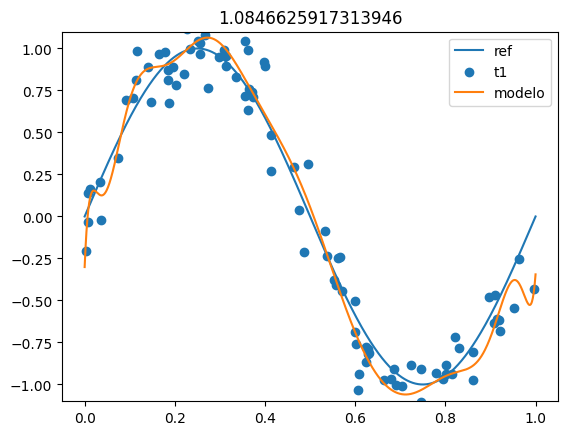

1.0846625917313946


In [ ]:
N = 100 #Número de datos
M = 15 #Orden


x = np.random.uniform(0,1,N)
t0 = np.sin(2*np.pi*x)
t1 = t0 + 0.2*np.random.normal(0,1,t0.shape)

w = learning(x,t1)
y = model_lireg(x)
l = loss(t1,y)

plt.plot(x_ref,t_ref,label='ref')
plt.scatter(x,t1,label='t1')
plt.plot(x_ref,model_lireg(x_ref),label='modelo')
plt.ylim([-1.1, 1.1])
plt.legend()
plt.title(l)
plt.show()

print(l)